<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./262_CAMS_GFAS_FRPFIRE_load_browse.ipynb"><< 262 - CAMS GFAS - Fire Radiative Power</a><span style="float:right;"><a href="./272_CEMS_GEFF_FWI_harmonized_danger_classes.ipynb">272 - CEMS GEFF - Fire Weather Index - Harmonized Danger Classes>></a></span>

<div class="alert alert-block alert-success">
<b>20 - DATA DISCOVERY</b></div>

<div class="alert alert-block alert-success">

<b>SEE ALSO</b>

* **20 - DATA DISCOVERY**
 - [272 - CEMS GEFF - Fire Weather Indix - Harmonized Danger Classes](./272_CEMS_GEFF_FWI_harmonized_danger_classes.ipynb) 
 - [273 - CEMS GEFF - Fire Weather Index - Custom Danger Classes](./273_CEMS_GEFF_FWI_custom_danger_classes.ipynb) 

</div>

<hr>

# 2.7.1 CEMS Global ECMWF Fire Forecasting (GEFF) - Fire Weather Index

The European Centre for Medium-Range Weather Forecasts ([ECMWF](https://www.ecmwf.int/)) produces daily fire danger forecasts and reanalysis products for the Copernicus Emergency Management Services ([CEMS](https://emergency.copernicus.eu/)). Activities are funded through a third-party agreement with the European Commission’s Joint Research Centre (JRC).

The modelling system that generates the fire data products is called Global ECMWF Fire Forecast ([GEFF](https://git.ecmwf.int//projects/CEMSF/repos/geff/browse)) and it is based on the Canadian Fire Weather index as well as the US and Australian fire danger systems.

#### Data overview

Fire danger data products:

- **geff-rt** provides the following *real-time* fire danger forecasts using weather forcings from the latest model cycle of the ECMWF’s Integrated Forecasting System (IFS):
    - high-resolution deterministic (~9 Km, with 10 days lead time) and 
    - lower-resolution probabilistic (~18Km, with 15 days lead time)
- **geff-re** provides historical records of global fire danger conditions (*reanalysis*) from 1980 to the present day. This dataset is updated as soon as new ERA-5 data becomes available (~2 months behind real-time) and it is made of four products:
    - deterministic model outputs (~28 Km),
    - probabilistic model outputs (made of 10 ensemble members, ~56 Km),
    - ensemble mean and
    - ensemble spread.
    
All of GEFF data products are under the Copernicus license, which provides users with free, full and open access to environmental data. Please note, the terms `GEFF data`, `EFFIS data` and `GWIS data` are considered synonyms and will be used interchangibly hereafter.

#### Data availability

- **geff-rt** data can be requested through an online [form](https://effis.jrc.ec.europa.eu/applications/data-request-form/) and viewed using the following platforms: the European Forest Fire Information System ([EFFIS](https://effis.jrc.ec.europa.eu/static/effis_current_situation/public/index.html)) and the Global Wildfire Information System ([GWIS](https://gwis.jrc.ec.europa.eu/static/gwis_current_situation/public/index.html))
- **geff-re** is available through the Copernicus Climate Data Store ([CDS](https://cds.climate.copernicus.eu)).

For educational purposes only, sample datasets are available on the [Zenodo wildfire community](https://zenodo.org/communities/wildfire). We will use these sample data hereafter.

<div class="alert alert-success">

All relevant global data is in the directory `./eodata/geff/global/` and local data is in `./eodata/geff/greece/`. 

#### Get the sample data from Zenodo

For educational purposes only, sample datasets are available on the [Zenodo wildfire community](https://zenodo.org/communities/wildfire). These samples provide a sneak peak into GEFF fire danger data.

Instructions:

1. Go to the Zenodo data repository: https://zenodo.org/

2. Click on 'Communities', then type 'Wildfire', then click on 'View'. The page should list several datasets.

3. Click on 'Fire Weather Index - ERA5 HRES', scroll down and download the 'fwi.nc' file.

4. Go back to the 'Wildfire' community page. Click on 'Global ECMWF Fire Forecasting system - sample data for wildfires in Attica (Greece) on 23-26 July 2018' (https://doi.org/10.5281/zenodo.3784753)

     a. Scroll down and click on the 'Download' button next to the following .tar files (it may take a while):
        - ECMWF_EFFIS_20180723_1200_en.tar
        - ECMWF_EFFIS_20180723_1200_hr.tar
        - ECMWF_EFFIS_20180723-26_1200_hr_e5.tar
        - ECMWF_EFFIS_20180723-26_1200_en_e5.tar
    
    b. Extract the tar files in your working directory.
</div>

#### Event of interest: Attica (Greece) fires, 23-26 July 2018
A series of wildfires in Greece, during the 2018 European heat wave, began in the coastal areas of Attica in July 2018. As of May 2019, 102 people were confirmed dead. Over 700 residents have been evacuated or rescued, mainly from the seaside settlements located north of the port town of Rafina, namely Kokkino Limanaki and Mati. Μore than 4,000 residents were affected by the wildfires. Greece deployed its entire fleet of fire-fighting aircraft and more than 250 fire engines, as well as over 600 firefighters. The Greek prime minister Alexis Tsipras declared a state of emergency in Attica. Many countries worldwide helped or offered aid to Greece. Government minister Nikos Toskas has suggested that there is evidence that arson may have been a cause of the fires in Mati. The first fire was ignited on 23rd July.
(Source: https://en.wikipedia.org/wiki/2018_Attica_wildfires).

Most of the active fires detected by the MODIS instruments was in the far west of Attica, close to the border with Corinthia, with a weaker signal detected in the eastern coastal region of Attica on 23/24 July.

#### Module outline:
* [1 - Introduction to fire assessment with GEFF/EFIS data](#intro_assessment)
* [2 - GEFF data exploration](#data_exploration)
  * [2.1 - geff-rt: Fire Danger Forecasts](#geff-rt)
  * [2.2 - geff-re: ERA5-based reanalysis of the Fire Weather Index](#geff-re)

<hr>

#### Load required libraries

In [1]:
# First of all, we need to import the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

<hr>

## <a id='intro_assessment'></a>Introduction to fire assessment with GEFF/EFFIS data

#### Load the Fire Radiative Power product from the CAMS GFAS dataset

Let us load the Fire Radiative Power product from the CAMS GFAS dataset to identify the locations where the fires in Attica actually occured.
CAMS GFAS data are disseminated in `netCDF` format and you can use xarray's function `xr.open_dataset()` to load the data.

You see that the data has a global coverage and 31 time steps - daily FRP data for July 2018.

In [23]:
# Open fire radiative power dataset
frp = xr.open_dataset("../eodata/geff/global/frp_20180701-31.nc")
frp

<xarray.Dataset>
Dimensions:    (latitude: 1800, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.05 0.15 0.25 0.35 ... 359.8 359.9 360.0
  * latitude   (latitude) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time       (time) datetime64[ns] 2018-07-01 2018-07-02 ... 2018-07-31
Data variables:
    frpfire    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-10 15:50:29 GMT by grib_to_netcdf-2.16.0: grib_to_n...

The next step is to geographically and temporally subset the global data to get more details on the specific fire events in Attica.

In [24]:
frp_subset = frp.loc[dict(time = slice('2018-07-23', '2018-07-26'), latitude = slice(39, 37), longitude = slice(23, 25))]
frp_subset

<xarray.Dataset>
Dimensions:    (latitude: 20, longitude: 20, time: 4)
Coordinates:
  * longitude  (longitude) float32 23.05 23.15 23.25 23.35 ... 24.75 24.85 24.95
  * latitude   (latitude) float32 38.95 38.85 38.75 38.65 ... 37.25 37.15 37.05
  * time       (time) datetime64[ns] 2018-07-23 2018-07-24 2018-07-25 2018-07-26
Data variables:
    frpfire    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-10 15:50:29 GMT by grib_to_netcdf-2.16.0: grib_to_n...

Now, let us create the FRP average over the selected four days (`23/07 - 26/07`) and plot the values where the `FRP value` was higher than 0.

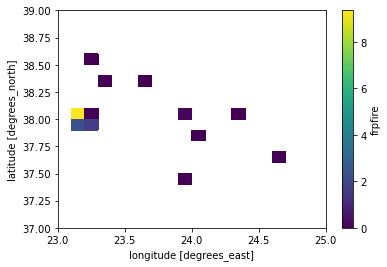

In [27]:
frp_subset_mean = frp_subset.frpfire.mean(dim = "time")
# Plot mean frpfire array
frp_subset_mean.where(frp > 0).plot()

#### Fire Danger Forecasts
Attica is characterised by very high temperatures in July (average temperature is 27°C, typical range is 22-32°C). On the day of the event, the FWI exceeded the extreme danger threshold in central Attica. In particular the areas, where fires where ignited, were all characterised by very high fire danger. Compared to the climatology, the fire weather fell between the 90th- and the 98th-percentile, reaching significantly positive anomalies. The dangerous fire weather that characterised Attica was forecasted 10 days ahead, according to the HRES. The ENS forecast, however, was characterised by a large spread in the distribution. In the fire affected areas the number of ensemble members exceeding the very high danger threshold was in the range 15-20%.

The training modules on GEFF data showcase how to use GEFF/EFFIS data to reproduce the above assessment. For convenience, a schematic representation of the forecast issue dates and leadtimes is provided in the table below ([link to spreadsheet](https://docs.google.com/spreadsheets/d/1o-b4i8hiiNF5_I-L4GbBECA01Pf-0bwtPGJH_WzCn-M/edit?usp=sharing)).

![schematic](../img/screenshot-docs.google.com-2020.05.07-10_43_55.png)

## <a id='data_exploration'></a>GEFF data exploration

The following section shows you how to load GEFF datasets and explore the content. We will touch briefly on the different spatial resolutions of each dataset and related implications (e.g. different land-sea mask -> different spatial coverage).

### <a id='geff-rt'></a>geff-rt: fire danger forecasts

The GEFF model uses weather forcings from the ECMWF’s Integrated Forecasting System (IFS) to generate fire danger forecasts. Based on the date of a particular event (e.g. 23-26 July 2018) we can find out what IFS model cycle was used, in this case it was 45r1.

![IFS model cycles](../img/IFS_model_cycles.png)

#### HRES forecast

This dataset provides real-time high-resolution deterministic (~9 Km) fire danger forecasts up to 10 days ahead. Let us explore the content of the sample file. Open the dataset with xarray's function `xr.open_dataset()`.

In [6]:
ds_rt_hr = xr.open_dataset("../eodata/geff/global/rt_hr/ECMWF_FWI_20180723_1200_hr.nc")
ds_rt_hr

<xarray.Dataset>
Dimensions:      (lat: 2560, lon: 5120, time: 10)
Coordinates:
  * lon          (lon) float32 0.0 0.07031 0.1406 0.2109 ... 359.8 359.9 359.9
  * lat          (lat) float32 89.95 89.88 89.81 89.74 ... -89.81 -89.88 -89.95
  * time         (time) datetime64[ns] 2018-07-23 2018-07-24 ... 2018-08-01
Data variables:
    fwi          (time, lat, lon) float32 ...
    ffmc         (time, lat, lon) float32 ...
    dmc          (time, lat, lon) float32 ...
    dc           (time, lat, lon) float32 ...
    isi          (time, lat, lon) float32 ...
    bui          (time, lat, lon) float32 ...
    dsr          (time, lat, lon) float32 ...
    danger_risk  (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.8.2 (http://mpimet.mp...
    Conventions:       CF-1.6
    Reference date:    20180723
    ECMWF fire model:  2.2
    Lincense:          Copernicus
    version:           2.2
    CDO:               Climate Data Operators version 1.8.2 (http://mpimet.mp...
    history:           Mon Jul 23 06:23:31 2018: ncatted -O -a version,global...
    NCO:               4.6.7

This dataset has three dimensions: latitude, longitude and time. Spatially, the data is distributed on a regular grid (2560 x 5120), while the time dimension is made of 10 levels (each corresponds to a daily forecast estimate). Each cell of this datacube contains 8 variables: 
* `fwi`
* `ffmc`
* `dmc`
* `dc`
* `isi` 
* `bui`
* `dsr`
* `danger_risk` 

To plot and run basic operations, it is convenient to extract one variable, e.g. `fwi`. 


In [28]:
da_rt_hr = ds_rt_hr.fwi
da_rt_hr

<xarray.DataArray 'fwi' (time: 10, lat: 2560, lon: 5120)>
[131072000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 0.07031 0.1406 0.2109 ... 359.7 359.8 359.9 359.9
  * lat      (lat) float32 89.95 89.88 89.81 89.74 ... -89.81 -89.88 -89.95
  * time     (time) datetime64[ns] 2018-07-23 2018-07-24 ... 2018-08-01
Attributes:
    units:    -
    title:    Fire Weather Index

With `xr.plot()`, you can plot e.g. the first day of the `Fire Weather Index` forecast.

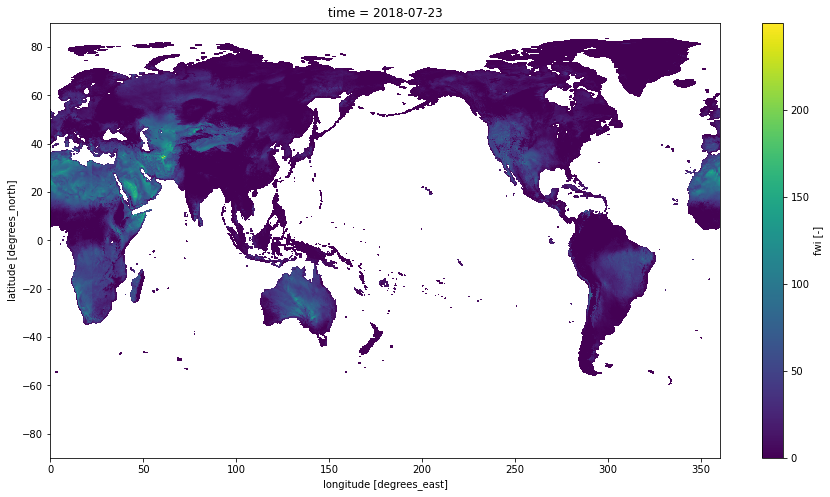

In [29]:
# Plot the first day
da_rt_hr[0].plot(figsize=(15,8));

#### ENS forecast

This dataset provides real-time probabilistic (~18 Km) fire danger forecasts up to 10 days ahead. Each member of the ensemble has similar structure to the HRES forecast, but lower resolution.

You can repeat the same steps as above:
* 1. Open the dataset with xarray's function `xr.open_dataset`
* 2. Extract the `fwi` (Fire Weather Index) variable
* 3. Plot the first day of the forecast

Open the dataset with `xr.open_dataset`:

In [30]:
ds_rt_en = xr.open_dataset("../eodata/geff/global/rt_en/ECMWF_FWI_20180723_1200_00.nc")
ds_rt_en

<xarray.Dataset>
Dimensions:      (lat: 1280, lon: 2560, time: 10)
Coordinates:
  * lon          (lon) float32 0.0 0.1406 0.2812 0.4219 ... 359.6 359.7 359.9
  * lat          (lat) float32 89.89 89.75 89.61 89.47 ... -89.61 -89.75 -89.89
  * time         (time) datetime64[ns] 2018-07-23 2018-07-24 ... 2018-08-01
Data variables:
    fwi          (time, lat, lon) float32 ...
    ffmc         (time, lat, lon) float32 ...
    dmc          (time, lat, lon) float32 ...
    dc           (time, lat, lon) float32 ...
    isi          (time, lat, lon) float32 ...
    bui          (time, lat, lon) float32 ...
    dsr          (time, lat, lon) float32 ...
    danger_risk  (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.8.2 (http://mpimet.mp...
    Conventions:       CF-1.6
    Reference date:    20180723
    ECMWF fire model:  2.2
    Lincense:          Copernicus
    version:           2.2
    CDO:               Climate Data Operators version 1.8.2 (http://mpimet.mp...
    history:           Mon Jul 23 07:30:54 2018: ncatted -O -a version,global...
    NCO:               4.6.7

Extract the variable `fwi`:

In [31]:
da_rt_en = ds_rt_en.fwi
da_rt_en

<xarray.DataArray 'fwi' (time: 10, lat: 1280, lon: 2560)>
[32768000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 0.1406 0.2812 0.4219 ... 359.4 359.6 359.7 359.9
  * lat      (lat) float32 89.89 89.75 89.61 89.47 ... -89.61 -89.75 -89.89
  * time     (time) datetime64[ns] 2018-07-23 2018-07-24 ... 2018-08-01
Attributes:
    units:    -
    title:    Fire Weather Index

This dataset is, again, a datacube with three dimensions: latitude, longitude and time but spatially, the data is distributed on a smaller regular grid (1280 x 2560) compared to the HRES forecast.

Plot the first forecast day with `xr.plot()`:

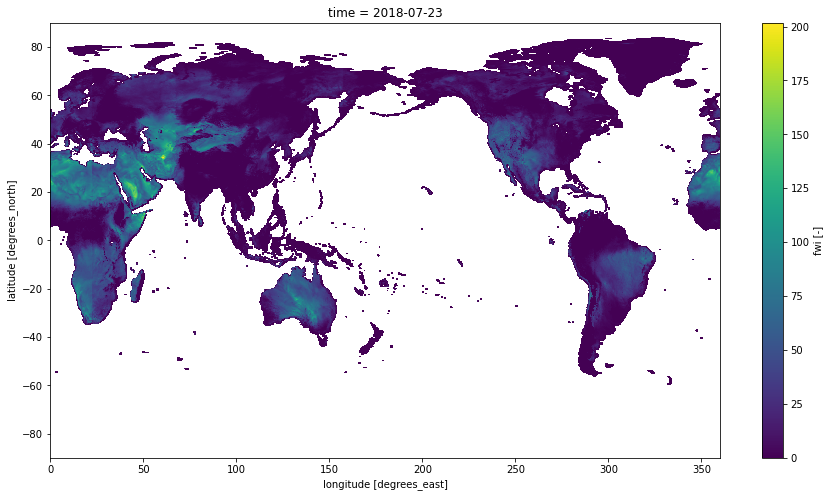

In [11]:
# Plot the first day
da_rt_en[0].plot(figsize=(15,8));

The difference in lower resolution is not evident at this scale, but it will become evident when we explore the same dataset cropped over Attica (Greece).

Let us geographically subset the `HRES forecast` and `ENS forecast` data over Attica, Greece. You can geographically subset the data with xarray's function `loc`.

In [32]:
lon_min = 23
lon_max = 25
lat_min = 37
lat_max = 39

Subsetted `HRES forecast` data for the first forecast day:

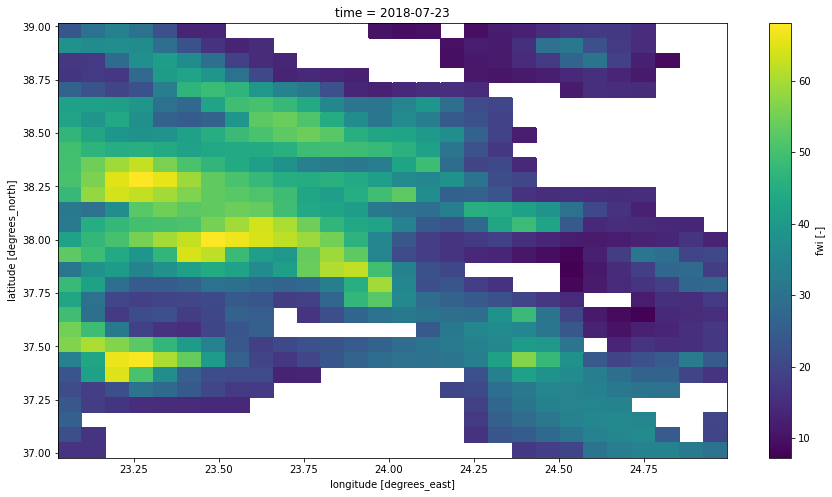

In [33]:
fwi_rt_hr = da_rt_hr.loc[dict(lat = slice(lat_max, lat_min), lon = slice(lon_min, lon_max))]
fwi_rt_hr[0].plot(figsize=(15,8));

And now, plot the first forecast day of the subset `ENS forecasts` data:

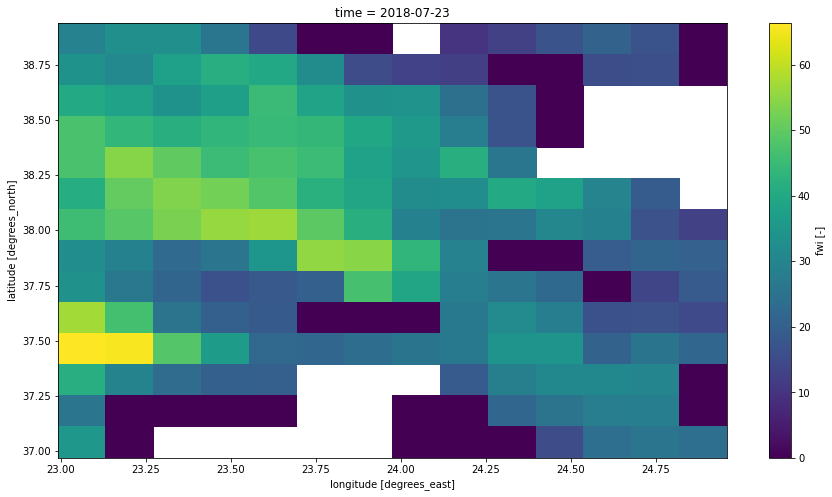

In [34]:
fwi_rt_en = da_rt_en.loc[dict(lat = slice(lat_max, lat_min), lon = slice(lon_min, lon_max))]
fwi_rt_en[0].plot(figsize=(15,8));

### <a id='geff-re'></a>geff-re: ERA5-based reanalysis of the Fire Weather Index

This dataset provides historical records of global fire danger conditions from 1980 to the present day and it is made of two main types of products: 
* (1) `deterministic model outputs` (HRES reanalysis), and
* (2) `probabilistic model outputs` (made of 10 ensemble members, ENS reanalysis). 

It is updated as soon as new ERA5 data becomes available (~2 months behind real-time). 

A single reanalysis layer is often used as proxy for observations (e.g. for validating the forecasts). Stacking together consecutive reanalysis estimates, allows to compute temporal trends and other long term statistics.

#### HRES reanalysis

Let's repeat the same operations shown above, this time the dataset has only o temporal layer.
The regular grid is smaller (640 x 1280) compared to the HRES/ENS forecasts.

The example below shows how to explore the single layer reanalysis. Examples of how to use a reanalysis datacube will be shown in the module [2.7.3](./273_GEFF_fire_forecast_custom_danger_classes.ipynb).

In [35]:
# Open the dataset
ds_e5_hr = xr.open_dataset("../eodata/geff/global/e5_hr/ECMWF_FWI_20180723_1200_hr.nc")
ds_e5_hr

<xarray.Dataset>
Dimensions:      (lat: 640, lon: 1280, time: 1)
Coordinates:
  * time         (time) datetime64[ns] 2018-07-23
  * lon          (lon) float32 0.0 0.2812 0.5625 0.8438 ... 359.2 359.4 359.7
  * lat          (lat) float32 89.78 89.51 89.23 88.95 ... -89.23 -89.51 -89.78
Data variables:
    fwi          (time, lat, lon) float32 ...
    ffmc         (time, lat, lon) float32 ...
    dmc          (time, lat, lon) float32 ...
    dc           (time, lat, lon) float32 ...
    isi          (time, lat, lon) float32 ...
    bui          (time, lat, lon) float32 ...
    dsr          (time, lat, lon) float32 ...
    danger_risk  (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.5 (http://mpimet.mp...
    Conventions:       CF-1.6
    Reference date:    20180723
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    CDO:               Climate Data Operators version 1.9.5 (http://mpimet.mp...
    history:           Tue Sep 24 14:30:46 2019: ncatted -O -a version,global...
    NCO:               netCDF Operators version 4.7.8 (Homepage = http://nco....

Extract the variable `fwi`, geographically subset the data to the Attica region and plot the first time step of the data object.

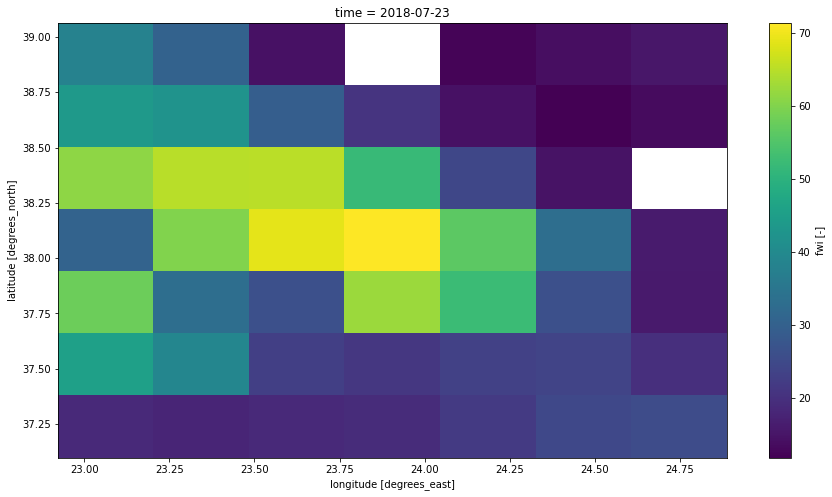

In [36]:
da_e5_hr = ds_e5_hr.fwi
fwi_e5_hr = da_e5_hr.loc[dict(lat = slice(lat_max, lat_min), lon = slice(lon_min, lon_max))]
fwi_e5_hr[0].plot(figsize=(15,8));

#### ENS reanalysis

Let us repeat the same operations shown above, one last time. The ENS reanalysis dataset of each ensemble member is similar to the HRES reanalysis but with an even coarser regular grid (320 x 640).

In [37]:
# Open the dataset
ds_e5_en = xr.open_dataset("../eodata/geff/global/e5_en/ECMWF_FWI_20180723_1200_00.nc")
ds_e5_en

<xarray.Dataset>
Dimensions:      (lat: 320, lon: 640, time: 1)
Coordinates:
  * time         (time) datetime64[ns] 2018-07-23
  * lon          (lon) float32 0.0 0.5625 1.125 1.688 ... 358.3 358.9 359.4
  * lat          (lat) float32 89.57 89.01 88.45 87.89 ... -88.45 -89.01 -89.57
Data variables:
    fwi          (time, lat, lon) float32 ...
    ffmc         (time, lat, lon) float32 ...
    dmc          (time, lat, lon) float32 ...
    dc           (time, lat, lon) float32 ...
    isi          (time, lat, lon) float32 ...
    bui          (time, lat, lon) float32 ...
    dsr          (time, lat, lon) float32 ...
    danger_risk  (time, lat, lon) float32 ...
Attributes:
    CDI:               Climate Data Interface version 1.9.5 (http://mpimet.mp...
    Conventions:       CF-1.6
    Reference date:    20180723
    ECMWF fire model:  3.0
    Lincense:          Copernicus
    version:           3.0
    CDO:               Climate Data Operators version 1.9.5 (http://mpimet.mp...
    history:           Sat Sep 28 00:26:11 2019: ncatted -O -a version,global...
    NCO:               netCDF Operators version 4.7.8 (Homepage = http://nco....

Extract the variable `fwi`, geographically subset the data to the Attica region and plot the first time step of the data object.

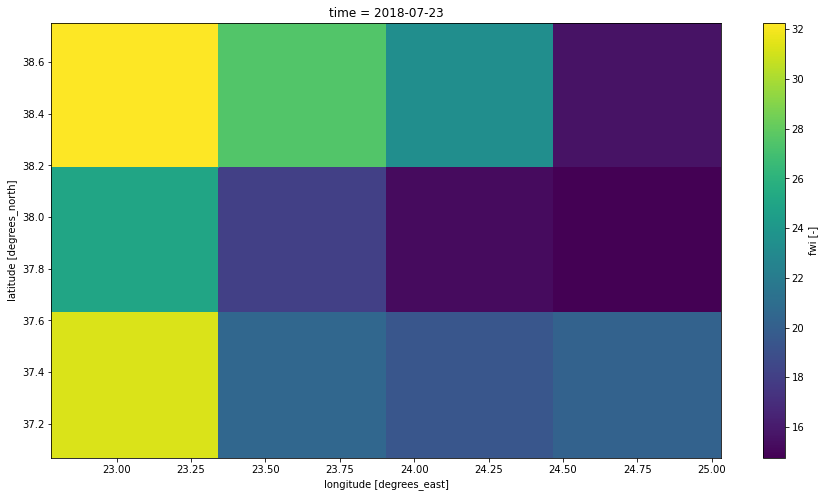

In [38]:
da_e5_en = ds_e5_en.fwi
fwi_e5_en = da_e5_en.loc[dict(lat = slice(lat_max, lat_min), lon = slice(lon_min, lon_max))]
fwi_e5_en[0].plot(figsize=(15,8));

To get an idea of how different the 10 ensemble realisations are, we can look at the mean and spread (standard deviation) of the ensemble.

In [39]:
# Let's first find the files containing the FWI indices
dir = "../eodata/geff/global/e5_en/"
pattern = "ECMWF_FWI"
matching_files = [f for f in os.listdir(dir) if pattern in f]
matching_files

['ECMWF_FWI_20180723_1200_00.nc',
 'ECMWF_FWI_20180723_1200_01.nc',
 'ECMWF_FWI_20180723_1200_02.nc',
 'ECMWF_FWI_20180723_1200_03.nc',
 'ECMWF_FWI_20180723_1200_04.nc',
 'ECMWF_FWI_20180723_1200_05.nc',
 'ECMWF_FWI_20180723_1200_06.nc',
 'ECMWF_FWI_20180723_1200_07.nc',
 'ECMWF_FWI_20180723_1200_08.nc',
 'ECMWF_FWI_20180723_1200_09.nc']

Note that for the purpose of calculating mean and spread, the order of the files in the directory is not important!

Now, let us loop over the ensemble data files, extract the `fwi` variable from each file, geographically subset over Attica and concatenate the layers.

In [40]:


# Initialise empty list
fwi = []
for filename in matching_files:
    full_path = os.path.join(dir, filename)
    # Open the dataset
    ds = xr.open_dataset(full_path)
    # Extrac the fwi variable
    da = ds.fwi
    # Geographically subset over Attica
    layer = da.loc[dict(lat = slice(lat_max, lat_min), lon = slice(lon_min, lon_max))]
    # Append
    fwi.append(layer)
    
combined = xr.concat(fwi, dim = 'time')
combined

<xarray.DataArray 'fwi' (time: 10, lat: 3, lon: 4)>
array([[[32.25161 , 27.503012, 23.357252, 15.581   ],
        [25.044817, 18.038017, 15.267973, 14.75343 ],
        [31.245638, 20.52204 , 19.402939, 20.199741]],

       [[33.734856, 29.238194, 23.143227, 15.766999],
        [26.87449 , 19.720354, 15.846203, 12.91823 ],
        [30.370144, 20.830925, 20.011215, 20.816473]],

       [[29.34913 , 25.702015, 21.245344, 16.472326],
        [26.006668, 19.125738, 15.268949, 14.04259 ],
        [30.744251, 20.518883, 18.03241 , 19.78507 ]],

       [[30.796589, 27.270647, 22.002693, 14.722291],
        [25.160019, 19.930038, 17.197914, 15.028749],
        [30.899532, 21.402328, 20.882746, 21.569597]],

       [[35.2339  , 32.539154, 26.012497, 17.063728],
        [26.072706, 19.440876, 16.1348  , 15.99126 ],
        [29.851995, 19.529465, 19.580582, 21.41345 ]],

       [[31.745092, 28.912397, 24.311544, 17.068493],
        [23.246479, 18.37367 , 17.433662, 15.528998],
        [27.256971, 18.203241, 20.181372, 22.863895]],

       [[32.22624 , 30.856443, 27.044855, 17.050581],
        [26.212416, 20.507957, 17.77196 , 15.778754],
        [29.346165, 21.778257, 22.118362, 23.07752 ]],

       [[32.754128, 28.792688, 22.801891, 15.922373],
        [24.383713, 17.994955, 15.855537, 14.045992],
        [28.742538, 19.076477, 19.380913, 21.956661]],

       [[31.056591, 28.60585 , 24.118923, 16.440517],
        [24.995966, 17.77584 , 16.201256, 13.162543],
        [29.273064, 18.935133, 19.620148, 19.981894]],

       [[33.21784 , 32.584965, 27.364187, 16.152023],
        [22.789358, 17.754286, 16.830362, 15.93983 ],
        [25.290659, 17.924248, 18.962967, 22.767504]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-07-23 2018-07-23 ... 2018-07-23
  * lon      (lon) float32 23.06 23.62 24.19 24.75
  * lat      (lat) float32 38.47 37.91 37.35
Attributes:
    units:    -
    title:    Fire Weather Index

With `xr.mean()` you can create the average over a specified dimension, e.g. time. With `xr.plot()`, you can plot the mean `Fire Weather Index` of the 10 ensembles.

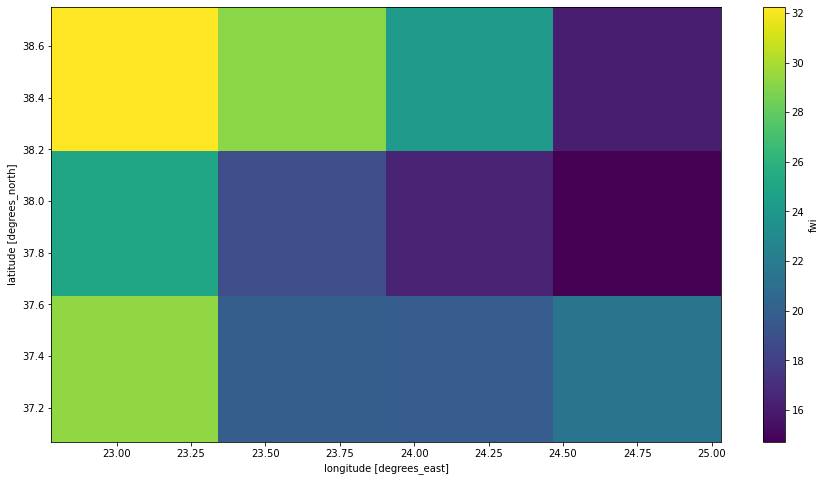

In [20]:
# Calculate mean, then plot
mean_fwi = combined.mean(dim = "time")
mean_fwi.plot(figsize=(15,8))

The function `xr.std()` allows you to calculate the standard devidation of the 10 ensemble members. With `xr.plot()`, you can visualize the standard deviation of the 10 ensemble members.

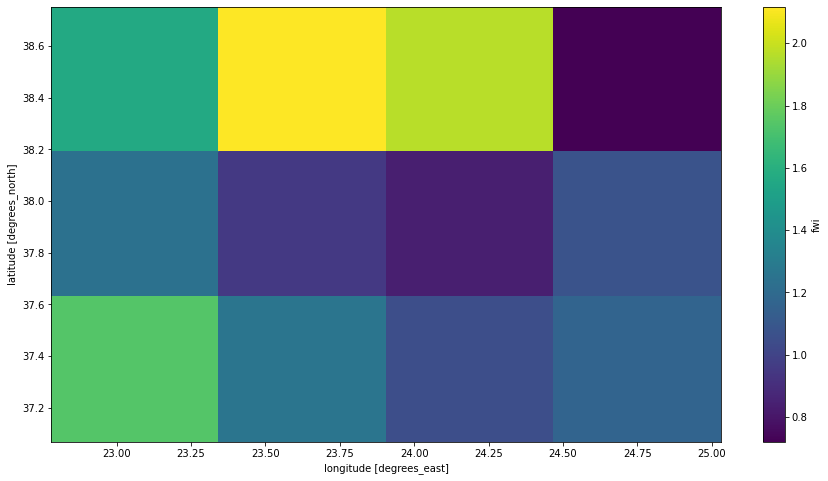

In [41]:
std_fwi = combined.std(dim = "time")
std_fwi.plot(figsize=(15,8))

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./262_CAMS_GFAS_FRPFIRE_load_browse.ipynb"><< 262 - CAMS GFAS - Fire Radiative Power</a><span style="float:right;"><a href="./272_CEMS_GEFF_FWI_harmonized_danger_classes.ipynb">272 - CEMS GEFF - Fire Weather Index - Harmonized Danger Classes>></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>